ChatBot History:
https://chatgpt.com/share/66fb03fa-a890-8011-b4cc-3b585d0e24b0
https://chatgpt.com/share/66fef6ab-4e00-8003-8b93-b0cd8e8ffe2a

Summary of Key Concepts 

1. Quantiles: A quantile is a statistical value that divides a dataset into intervals based on a specified percentage. For example, the 2.5% quantile is the value below which 2.5% of the data points fall. When calculating a quantile, the position can be a non-integer (e.g., 0.5). This indicates that the quantile lies between two values in the dataset, and interpolation is used to find the exact value. 
2. Calculating the 2.5% Quantile: For a dataset (e.g., [1, 2, 3, ..., 20]), to find the 2.5% quantile: Calculate 2.5% of the total count. For 20 values, 0.025 × 20 = 0.5 0.025×20=0.5. Since 0.5 is not a valid index, interpolate between the first (1) and second (2) values. The 2.5% quantile is calculated as 1 + 0.5 × ( 2 − 1 ) = 1.5 1+0.5×(2−1)=1.5. This means that 2.5% of the values in the dataset fall below 1.5. 
3. Confidence Intervals: A confidence interval provides a range of values within which a population parameter (like the mean) is expected to lie, with a specified level of confidence (e.g., 95%). To construct a 95% confidence interval using bootstrapped sample means: Calculate the 2.5% quantile and 97.5% quantile of the bootstrapped means. The confidence interval is defined as: \text{Confidence Interval} = [\text{2.5% quantile}, \text{97.5% quantile}] This means that you are 95% confident that the true population mean lies between the values given by the 2.5% and 97.5% quantiles.

# Question 1 
The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

Standard deviation means how spread out the data is from the sample mean, and the standard error of the mean is how accurate the mean of the sample is, comparing to the mean of the actual population. Standard deviation (SD) focuses on the variability of the sample dataset, while standard error of the mean (SEM) focuses on the precision of the sample with regards to population. The higher the SD the further the data spreads away from the sample mean, and SEM decreases as the sample size increases, meaning lower SEM indicates more reliable sample.

# Question 2. 

The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

Bootstrap the sample, then calculate all the sample means, then I find SEM = (SD of bootstrap means)/ (sqrt(n)). To determine Confidence Interval, I can use the formular 

CI = mean of orginal dataset ± (1.96 × SEM)

# Question 3.
Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

The 95% bootstrapped confidence interval is then defined as the range between the 2.5th percentile and the 97.5th percentile of the bootstrap means.
lower_percentile = np.quantile(bootstrap_means, 0.025)  # 2.5th percentile
upper_percentile = np.quantile(bootstrap_means, 0.975)  # 97.5th percentile

# Question 4.
The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
#Import library
import numpy as np

#Generate a dataset that has 100 elements, the sample mean is 100 and the std is 15
sample_data = np.random.normal(loc=100, scale=15, size=100)

#Randomly pick elements from the dataset to create another boostrapped dataset,
#allow repeating value, repeats that process 1000 times
n_bootstrap_samples = 1000

#Empty list to store the stats
bootstrap_statistics = []

#Begin the bootstrapping process
for _ in range(n_bootstrap_samples):
    #Pick randomly elements from the original sample, allow repetition to make another set that
    #contains the same number of elements as the original dataset
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    
    #find the mean of the sample
    statistic = np.mean(bootstrap_sample) #This line can be changed as below to manipulate other stats
    #statistic = np.mean(bootstrap_sample) #Finding the median of the sample
    
    #Store the value of the sample mean
    bootstrap_statistics.append(statistic)

    #convert the list of the sample mean into array
bootstrap_statistics = np.array(bootstrap_statistics)

#Find the values at which 2.25% and 97.5% of the dataset falls into
lower_percentile = np.quantile(bootstrap_statistics, 0.025)
upper_percentile = np.quantile(bootstrap_statistics, 0.975)

#The range below works 95% of the time
confidence_interval = (lower_percentile, upper_percentile)

print(f"95% Bootstrapped Confidence Interval: {confidence_interval}")


95% Bootstrapped Confidence Interval: (98.66423529936074, 104.81396753655089)


# Question 5
The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

We need to distinguish between the role of the population parameter and the sample statistic because the statistic represents only a portion of the population. This means that the statistic may not fully capture the variability present in the entire population. As a result, while the population parameter provides the true value, the sample statistic only gives us an estimate. Confidence intervals help us account for the uncertainty associated with this estimate by indicating a range where we expect the population parameter to lie. In essence, the population parameter reflects the true characteristic of the population more accurately, while the sample statistic offers an approximation of what the population may look like

# Question 6
Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

1. What is the process of bootstrapping?

Bootstrapping begins with a sample drawn from a population. From this sample, we create multiple new datasets by randomly selecting elements with replacement, ensuring that each new dataset has the same number of elements as the original sample. This process is repeated multiple times, resulting in a collection of bootstrapped datasets that reflect the variability of the population.

2. What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to estimate the sampling distribution of a statistic, such as the mean, by generating multiple bootstrapped datasets from a single sample. This allows us to evaluate the variability of the statistic without needing to collect more sample in multiple trials. Bootstrapping is particularly useful when obtaining more data is impractical due to lack of time or resource.

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

To assess if my hypothesized population mean is plausible, I will use bootstrapping to generate 1,000 to 10,000 bootstrapped datasets from the sample. For each bootstrapped dataset, I will calculate the sample mean and then determine the 95% confidence interval for these means. I will compare the hypothesized population mean to this confidence interval. If the hypothesized mean falls within the interval, it suggests that my guess is plausible, as the sample mean reflects the population mean at a 95% confidence level.

# Question 8

1. Problem Introduction
In this context, the null hypothesis of "no effect" means that taking the medicine didn't really improve the patients' health scores. It assumes that any difference between their health scores before and after taking the medicine is because of random variation or natural fluctuations, not because of the treatment itself. The null hypothesis of "no effect" depicts that the mean difference between the initial and final health scores is zero

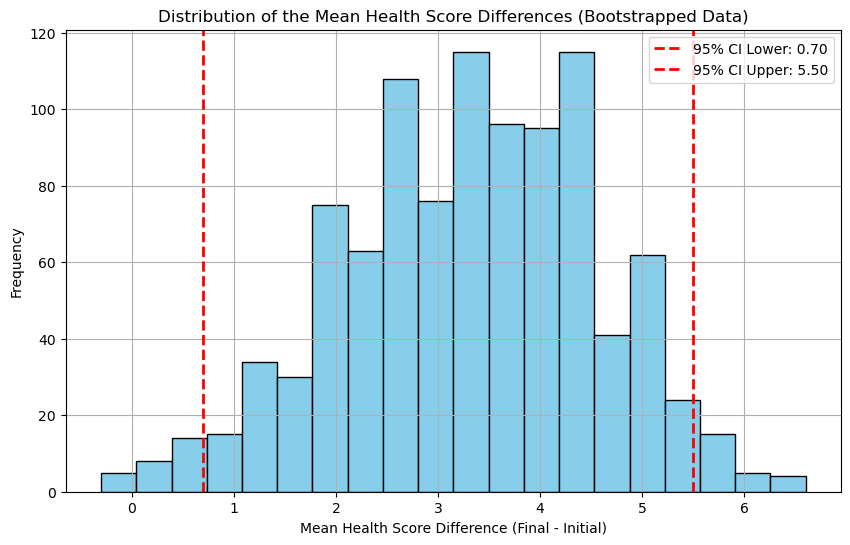

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Original dataset
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Bootstrapping the dataset
np.random.seed(42)  # Ensure reproducibility
n_iterations = 1000  # Number of bootstrapped samples
bootstrapped_data = []

for _ in range(n_iterations):
    sample = df.sample(n=len(df), replace=True)  # Resampling with replacement
    bootstrapped_data.append(sample.mean())

# Convert bootstrapped data to DataFrame
bootstrapped_df = pd.DataFrame(bootstrapped_data)

# Calculate the difference between Final and Initial Health Scores in the bootstrapped dataset
bootstrapped_df['Health Score Difference'] = bootstrapped_df['FinalHealthScore'] - bootstrapped_df['InitialHealthScore']

# Calculate the 95% confidence interval for the health score differences
ci_lower = np.percentile(bootstrapped_df['Health Score Difference'], 2.5)
ci_upper = np.percentile(bootstrapped_df['Health Score Difference'], 97.5)

# Create a histogram of the differences with the 95% confidence interval
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_df['Health Score Difference'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=2, label=f'95% CI Lower: {ci_lower:.2f}')
plt.axvline(ci_upper, color='red', linestyle='dashed', linewidth=2, label=f'95% CI Upper: {ci_upper:.2f}')
plt.title('Distribution of the Mean Health Score Differences (Bootstrapped Data)')
plt.xlabel('Mean Health Score Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()


Analysis: To analyze if the improvement health score is actually from the effectiveness of the medication or if it results from randomness (lifestyle, current health condition,...), I create a bootstrapped dataset, taking the mean difference between the initial and final health score. To do this, I bootstrap the dataset and set the sample size to 1000. This means 1000 samples (containing health scores of 10 people each) will be randomly picked from the original dataset. Then I find the difference between the initial mean health score and final mean health score. Then I find the 95% confidence interval to study the distribution of the mean difference and plotted the histogram. Because the 95% confidence interval does not include 0, and within that range, the difference of the means of health scores is positive, therefore, there's an actual impact of the medicine on the patient, which fails the null hypothesis of "no effect". 

With 95% confidence, we can reject the null hypothesis that the medicine has no effect.

Further consideration: Since the dataset only has the health score of 10 patients, which is a small sample size, it is not likely to reflect the true characteristics of the population. For higher accuracy, the sample size should be larger. 

In [3]:
df.head()
df.to_csv("health_data.csv",index = False)
health_data = pd.read_csv("health_data.csv")
health_data.head()

,PatientID,InitialHealthScore,FinalHealthScore
0,1,84,86
1,2,78,86
2,3,83,80
3,4,81,86
4,5,81,84
